In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### Loading data from url

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported from URL!")

s_data.head(10)

Data imported from URL!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Saving the URL data from dataframe as CSV

In [4]:
s_data.to_csv('study_hours_dataset.csv')

### Plotting data points on a 2-D graph


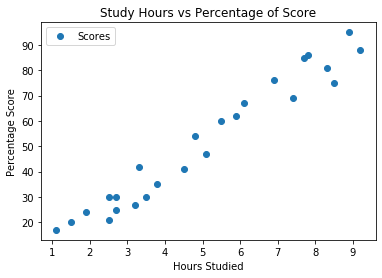

In [6]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage of Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Data preperation for ML

In [11]:
#The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
X = s_data.iloc[:, :-1].values   #Input - Attribute (Hours) #it is also possible to create a list of features needed for large datasets
y = s_data.iloc[:, 1].values     #Output - Labels   (Scores)

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Training the algorithm

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [61]:
print('Accuracy of the model is', regressor.score(X_train,y_train))

Accuracy of the model is 0.9515510725211552


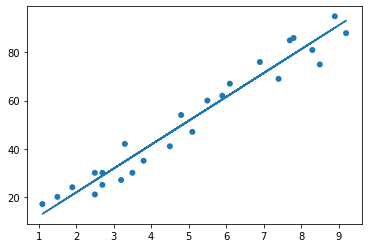

In [15]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y, edgecolors='none')
plt.plot(X, line);
plt.show()

### Making prediction

In [16]:
print(X_test) # Testing data - In Hours


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [17]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [18]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [82]:
make_pred = regressor.predict(np.array([9.25]).reshape(1,1))

print("No of Hours = {}".format(9.25))
print("Predicted Score =", make_pred[0])


No of Hours = 9.25
Predicted Score = 93.69173248737538


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))